# Heart Disease Prediction Using Machine Learning

## Introduction

Heart disease is a major health issue worldwide, and it is difficult to discover the disease before symptoms emerge. Our goal of this project is to utilize machine learning techniques and predict whether or not a person has heart disease. This will be done through our dataset, which is derived from the Cleveland Heart Disease Database and consists of 14 important attributes selected from a total of 76. It encompasses a range of variables including physical and psychological details, such as age, sex, cholesterol, etc. It also categorizes individuals based on the absence (value 0) or presence (values 1-4) of heart disease, providing a clear framework for analyzing the predictive power of medical test results. 

## Methods:

### We are going to do the following: 

1. Mutate the data to make sure categorical variables are treated as factors
2. Change the variable names to more descriptive and human-readable
3. Use k-nearest neighbors regression algorithm to predict the likeliness of a person having a heart disease using the blood pressure, cholesterol, blood sugar and heart rate attributes.
4. We will scale the data in order to standardize the data.
5. We will use a bar plot to visualize how an attribute affects the likelihood to have a heart disease.


## EXPECTED OUTCOMES AND SIGNIFICANCE

### What do you expect to find?
After this project, we expect to find that cholesterol, heart rate, fasting blood sugar and blood pressure have a positive relation to the probability of having heart diseases.

### What impact could such findings have?
With these findings, we can track down symptoms of heart disease earlier than usual, allowing doctors to begin treatment in the early stages, or warn the patient of potential heart disease.


### What future questions could this lead to?
Future studies could implement similar algorithms to find other health diseases.

In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# clean and wrangle data
cleveland_data <- read_csv("data/processed_cleveland.csv")|>
                mutate(sex = as_factor(sex),
                       cp = as_factor(cp),
                       fbs = as_factor(fbs),
                       restecg = as_factor(restecg),
                       exang = as_factor(exang),
                       slope = as_factor(slope),
                       thal = as_factor(thal),
                       num = as_factor(num),
                       ca = as.integer(ca))|>
                rename(chest_pain = cp,
                       blood_pressure = trestbps,
                       cholesterol = chol,
                       blood_sugar = fbs,
                       rest_ecg = restecg,
                       heart_rate = thalach,
                       angina = exang,
                       st_depression = oldpeak,
                       num_vessels = ca,
                       diagnosis = num)

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,angina,st_depression,slope,num_vessels,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7.0,2


In [3]:
# splitting data into training and testing
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)

Rows: 226
Columns: 14
$ age            <dbl> 63, 37, 41, 57, 57, 56, 44, 57, 48, 64, 58, 50, 66, 43,…
$ sex            <fct> 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1…
$ chest_pain     <fct> 1, 3, 2, 4, 4, 2, 2, 3, 3, 1, 1, 3, 1, 4, 1, 4, 3, 4, 3…
$ blood_pressure <dbl> 145, 130, 130, 120, 140, 140, 120, 150, 130, 110, 150, …
$ cholesterol    <dbl> 233, 250, 204, 354, 192, 294, 263, 168, 275, 211, 283, …
$ blood_sugar    <fct> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ rest_ecg       <fct> 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ heart_rate     <dbl> 150, 187, 172, 163, 148, 153, 173, 174, 139, 144, 162, …
$ angina         <fct> 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1…
$ st_depression  <dbl> 2.3, 3.5, 1.4, 0.6, 0.4, 1.3, 0.0, 1.6, 0.2, 1.8, 1.0, …
$ slope          <fct> 3, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 1, 2…
$ num_vessels    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0…
$ thal           <

In [4]:
# summarizing the number of observations of each diagnosis in the training data
heart_disease_proportions <- cleveland_train |>
                          group_by(diagnosis) |>
                          summarize(n = n()) |>
                          mutate(percent = 100*n/nrow(cleveland_train))
heart_disease_proportions

# summarizing the mean of blood pressure, cholesterol, and heart rate for each diagnosis
average_values <- cleveland_train |>
                group_by(diagnosis) |>
                summarize(mean_blood_pressure = mean(blood_pressure),
                          mean_cholesterol = mean(cholesterol),
                          mean_heart_rate = mean(heart_rate))
average_values

diagnosis,n,percent
<fct>,<int>,<dbl>
0,123,54.424779
1,41,18.141593
2,26,11.504425
3,25,11.061947
4,11,4.867257


diagnosis,mean_blood_pressure,mean_cholesterol,mean_heart_rate
<fct>,<dbl>,<dbl>,<dbl>
0,129.8130,237.3496,157.4797
1,131.3902,251.0000,146.1463
2,133.1154,253.5000,137.0385
3,137.8800,257.4400,133.2400
4,138.5455,243.7273,140.1818


## Resting blood pressure (blood_pressure) vs serum cholesterol level

We are visualizing the relationship between resting blood pressure (blood_pressure) and serum cholesterol levels (cholesterol) in the cleveland_train dataset, with points colored based on heart disease diagnosis (diagnosis). The points are translucent (60% opaque) to help distinguish overlapping points. The plot includes custom labels for axes and the color, and sets the text size to 13 for readability.

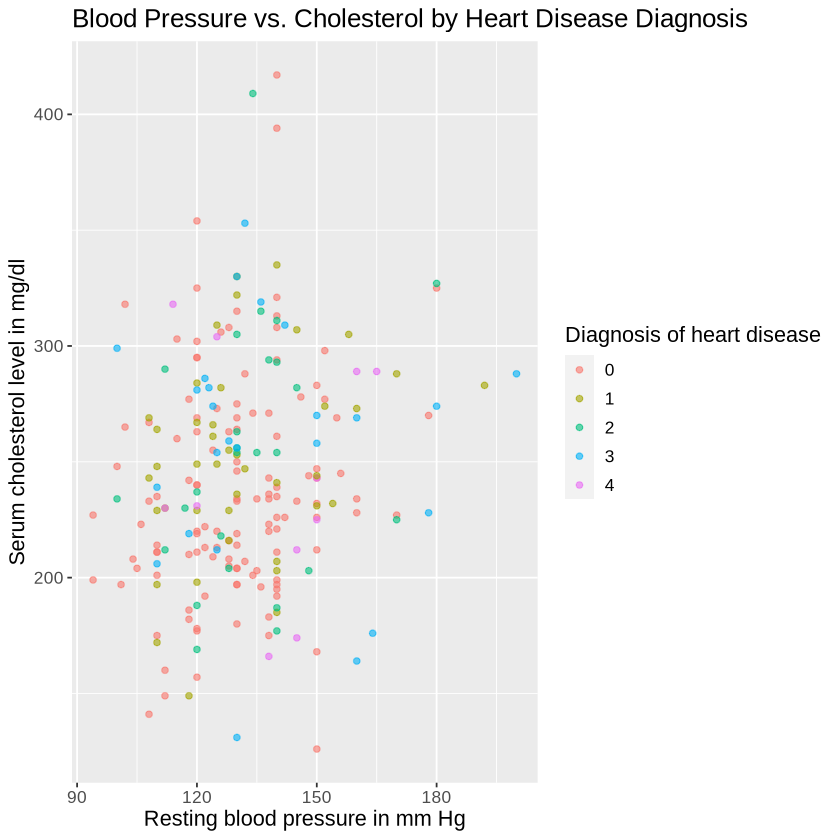

In [5]:
rbp_chol_plot <- ggplot(cleveland_train, aes(x = blood_pressure, y = cholesterol, color = diagnosis)) +
                geom_point(alpha = 0.6) +
                labs(x = "Resting blood pressure in mm Hg", 
                     y = "Serum cholesterol level in mg/dl", 
                     color = "Diagnosis of heart disease",
                    title = "Blood Pressure vs. Cholesterol by Heart Disease Diagnosis") +
                theme(text = element_text(size = 13))
rbp_chol_plot

## Resting blood pressure (blood_pressure) vs maximum heart rate

Relationship between resting blood pressure (blood_pressure) and maximum heart rate (heart_rate) in the cleveland_train dataset, with data points colored by heart disease diagnosis (diagnosis). Points are translucent for clarity, and custom labels enhance readability.

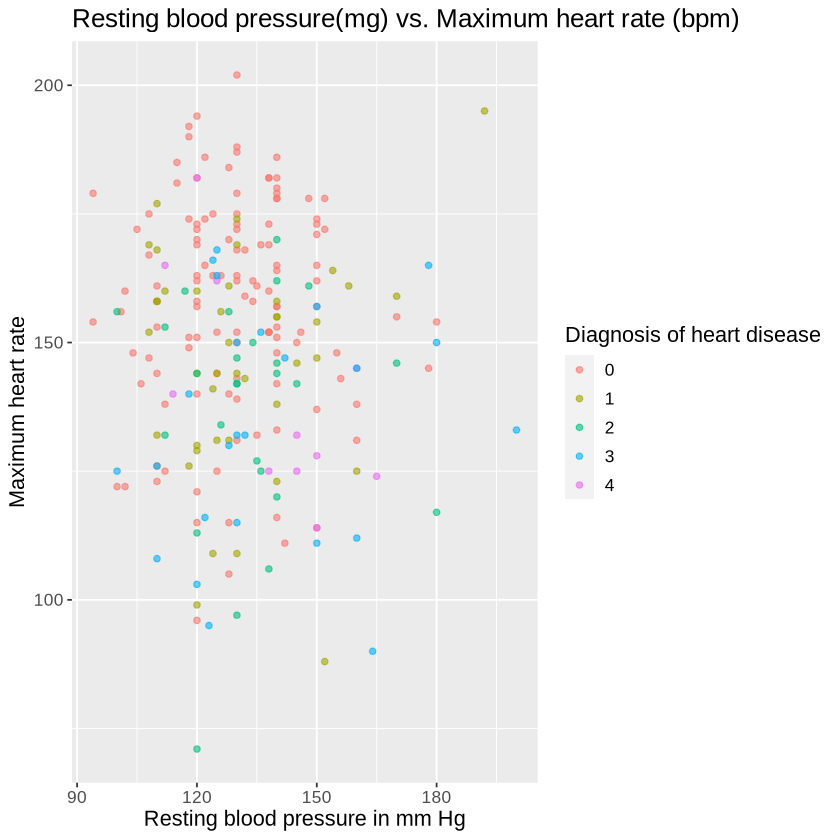

In [6]:
rbp_hr_plot <- ggplot(cleveland_train, aes(x = blood_pressure, y = heart_rate, color = diagnosis)) +
                geom_point(alpha = 0.6) +
                labs(x = "Resting blood pressure in mm Hg", 
                     y = "Maximum heart rate", 
                     color = "Diagnosis of heart disease",
                    title = "Resting blood pressure(mg) vs. Maximum heart rate (bpm)") +
                theme(text = element_text(size = 13))
                
rbp_hr_plot

## Ratio of individuals with and without fasting blood sugar levels above 120 mg/dl within each heart disease diagnosis category

Bars are filled by diagnosis, with the y-axis representing the relative ratio within each blood sugar category, facilitating comparison of disease prevalence across blood sugar levels.

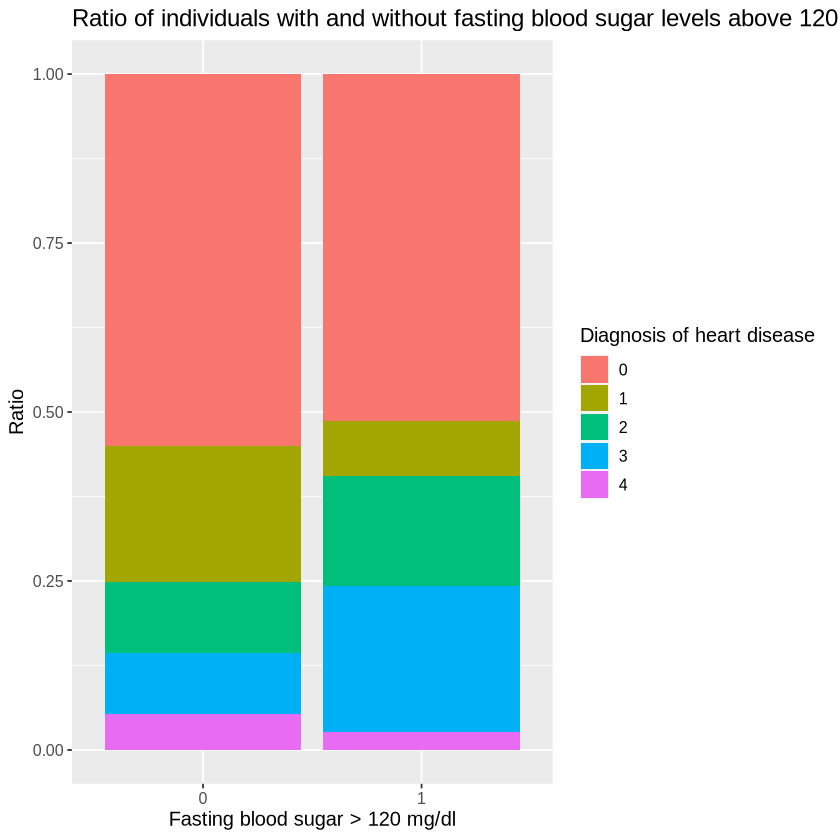

In [7]:
fbs_ratio_plot <- ggplot(cleveland_train, aes(x = blood_sugar, fill = diagnosis)) +
                geom_bar(position = "fill") +
                labs(x = "Fasting blood sugar > 120 mg/dl",
                     y = "Ratio",
                     fill = "Diagnosis of heart disease",
                    title = "Ratio of individuals with and without fasting blood sugar levels above 120 mg/dl within each heart disease diagnosi category") +
                theme(text = element_text(size = 12))
fbs_ratio_plot

## Distribution of heart disease diagnoses (diagnosis) in the Cleveland Train dataset among various forms of chest pain (chest_pain)

The data is divided into divisions that show the percentage of each diagnosis category within a given chest pain type, each bar represents a different form of chest pain. The ratio, which displays the relative frequency of diagnoses for each form of chest discomfort, is shown on the y-axis. 

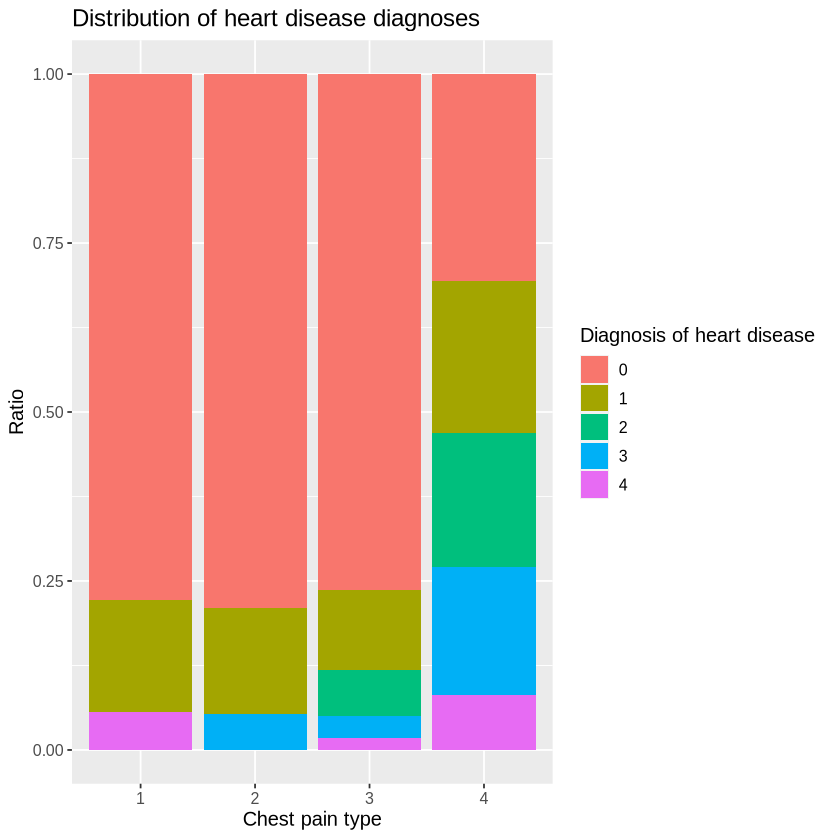

In [8]:
cp_ratio_plot <- ggplot(cleveland_train, aes(x = chest_pain, fill = diagnosis)) +
                geom_bar(position = "fill") +
                labs(x = "Chest pain type",
                     y = "Ratio",
                     fill = "Diagnosis of heart disease",
                    title = "Distribution of heart disease diagnoses") +
                theme(text = element_text(size = 12))
cp_ratio_plot

## Examining how the cleveland_train dataset's distribution of three important health metrics—blood pressure, cholesterol, and heart rate—varies between various heart disease diagnosis groups:

1. The Blood Pressure Box Plot, or bp_box_plot, shows the distribution of blood pressure readings for various heart disease classifications.
2. Cholesterol Box Plot (chol_box_plot): Displays the relationship between cholesterol levels and the diagnosis of heart disease.
3. The Heart Rate Box Plot (hr_box_plot) shows how heart rates vary depending on the diagnosis category.

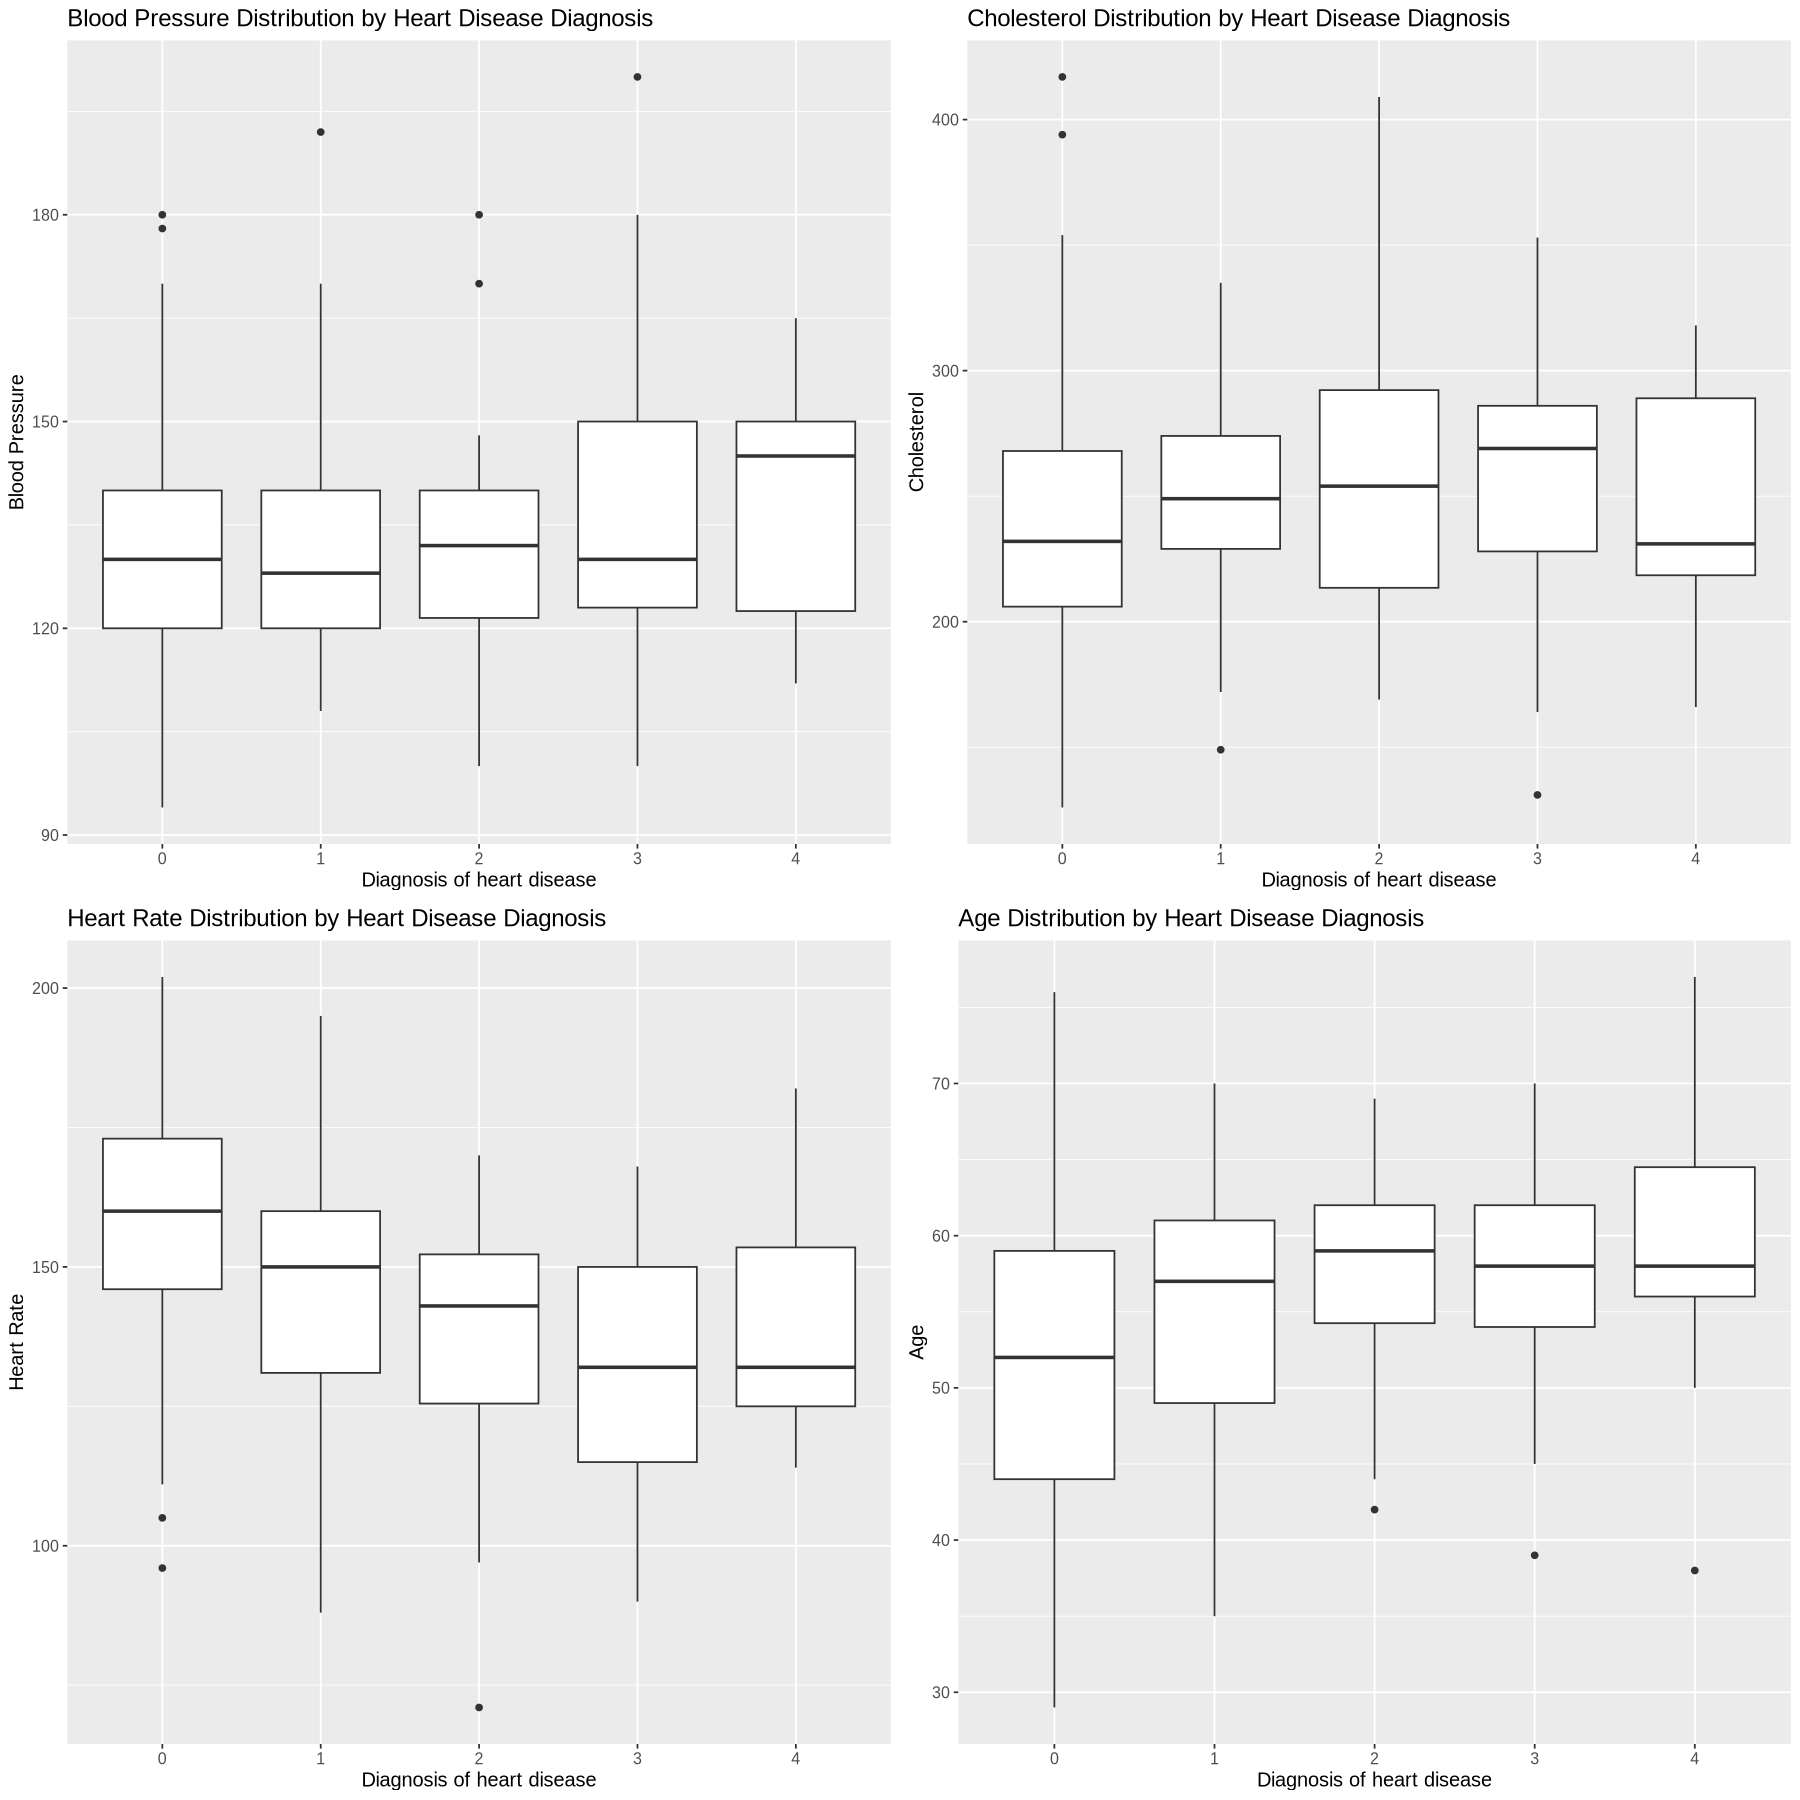

In [9]:
options(repr.plot.height = 15, repr.plot.width = 15)
bp_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = blood_pressure)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Blood Pressure", title = "Blood Pressure Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 12))

chol_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = cholesterol)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Cholesterol", title = "Cholesterol Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 12))

hr_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = heart_rate)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Heart Rate", title = "Heart Rate Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 12))
age_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = age)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Age", title = "Age Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 12))

plot_grid(bp_box_plot, chol_box_plot, hr_box_plot,age_box_plot, ncol = 2)